In [4]:
from PIL import Image
img_mont = Image.open("Theory/image41.png")

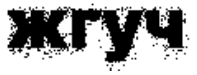

In [5]:
img_mont

In [56]:
import cv2

img1 = cv2.imread('Theory/image41.png')
clean = cv2.fastNlMeansDenoising(img1, None, 50)

In [57]:
img = PIL.Image.fromarray(clean).convert('L')

In [70]:
import cv2

img1 = cv2.imread('Theory/image41.png')
clean1 = cv2.fastNlMeansDenoising(img1, None, 40)
img2 = PIL.Image.fromarray(clean1).convert('L')

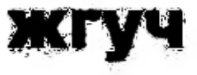

In [71]:
img2

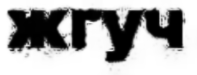

In [58]:
img

In [59]:
img.save('img.png')

In [64]:
import torchvision
from torchvision import transforms, models
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

from PIL import Image
img_mont = Image.open("Theory/img.png").convert('RGB')

img_mont_preprocessed = preprocess(img_mont)

batch_img_mont_tensor = torch.unsqueeze(img_mont_preprocessed, 0)

In [63]:
import torch 
PATH = "models_panagram/bw/models/googlenet_model.pt"
model_google = torch.load(PATH)
model_google.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [65]:
out = model_google(batch_img_mont_tensor)
out

tensor([[-3.6654, -3.2578, -1.5671, -0.9527, -0.8914, -2.9286, -1.0101, -3.8497,
          4.1394, -5.0544]], grad_fn=<AddmmBackward>)